# L'algorithme de descente de gradient 

## 1. Le cas d'une fonctionnelle quadratique
 
Tout d'abord, nous appliquons la méthode à une fonctionnelle quadratique :
\begin{align}\label{quadf}\tag{1} f(x)=\dfrac12 x^TA x + b^T x +c,\qquad \text{pour } x\in \mathbb{R}^ N, \end{align}
avec
$A$ une matrice réelle $N\times N$, symétrique définie positive, $b\in\mathbb{R}^N$ et $c\in \mathbb{R}$. 

**Question 1.** Calculez le gradient et la matrice Hessienne de $f$.

**Question 2.** Que pouvez-vous en déduire sur la nature de $f$ ?

**Question 3.** Montrez que $f$ atteint son minimum sur $\mathbb{R}^N$ en un seul point $x^*$. Donnez une caractérisation de ce point. 

### 1.1 L'algorithme de descente de gradient à pas optimal

Soit $f$ une fonction convexe et coercive de classe $C^1$ sur $\mathbb{R}^N$. L'algorithme de descente de gradient à pas optimal est défini comme suit. 

Soit $x^0\in \mathbb{R}^N$ (on essaie de choisir $x^0$ proche de $x^*$, en l'absence d'indication on prend $x^0=0$). 

Ensuite, pour $k=0,1,2,\ldots\ $ jusqu'à convergence, répéter : 

$$
\left|
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(x^k),\\
\alpha_k &\longleftarrow &\mathop{argmin}_{t>0} f(x^k + td^k),\\ 
x^{k+1}&\longleftarrow &x^k+\alpha_k d^k
\end{array}
\right.
$$

**Question 4.** Proposez un critère d'arrêt pour l'algorithme qui utilise la caractérisation de la question **3**. 

*Remarque :** En général, on ne sait pas calculer $\alpha_k$ et en pratique, la deuxième étape est remplacée par une recherche approchée. Cependant, lorsque $f$ est quadratique, le calcul de $\alpha_k$ est ``facile''. 

**Question 5.** Dans le cas de la fonction quadratique (1), explicitez $d^k$ et $\alpha_k$ comme fonctions de $A$, $x^k$ et $b$. 

Maintenant, nous spécifions $N=2$ et
$$ A=\binom{C\quad 0}{0\quad 1},\quad C\ge 1,\quad b=0,\quad c=0.$$
**Question 6.** Quel est l'infimum de $f$ sur $\mathbb{R}^2$ dans ce cas ? Donner $x^*$. 

**Question 7.** Deux fonctions sont données ci-dessous :
- une fonction qui dessine un champ de vecteur donné par une application $F$. À titre d'exemple, elle est appliquée au champ de vecteurs $G(x,y)=(x, 8y)$ dans la boîte $[-8,8]\times[-2.1,2.1]$.
- une fonction qui dessine quelques lignes de niveau d'une fonction $f$. Elle est appliquée à $g(x,y)=\dfrac{x^2+8x^2}2$ toujours dans la boîte $[-8,8]\times[-2.1,2.1]$ avec 8 lignes de niveaux $g=0$, $g=4$, $\dots$, $g=28$.

Notez que $G=\nabla g$. Qu'observez-vous ? 

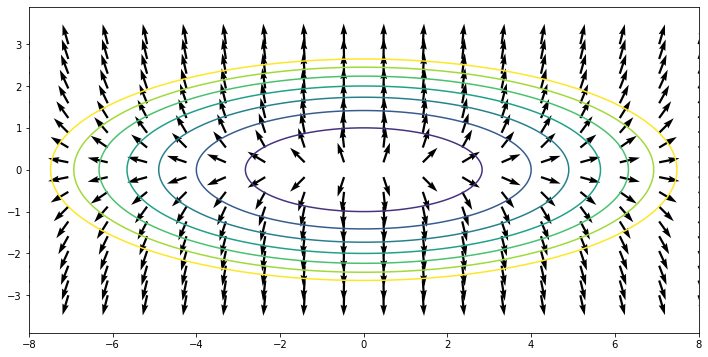

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

def draw_vector_field(F, xmin, xmax, ymin, ymax, N=20):
    X = np.linspace(xmin, xmax, N)  # x coordinates of the grid points
    Y = np.linspace(ymin, ymax, N)  # y coordinates of the grid points
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # compute the norm of (U,V)
    M[M == 0] = 1  # avoid division by 0
    U /= M  # normalize the u componant
    V /= M  # normalize the v componant
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 


g = lambda x, y: .5*(x**2 + 8*y**2)
G = lambda x, y: np.array([x, 8*y])
%matplotlib inline
plt.figure(figsize=(12,6))
level_lines(g, -8, 8, -3, 3, np.linspace(0, 28, 8))
draw_vector_field(G,  -8, 8, -3, 3, 18)
plt.axis('equal')
plt.show()

**Question 8.** Implémentez l'algorithme de descente de gradient à pas optimal. Le point initial doit être $x^0=\binom1C$.

**Question 9.** Sur le même graphique, représentez les itérations, quelques lignes de niveau de $f$ et le champ de vecteur normalisé $\dfrac {1}{|\nabla f|}\nabla f$. 

**Question 10.** Changez la valeur de $C$ de 1 à 32 ($C=1,2,4,8,16,32$). Qu'observez-vous ?

**Question 11.** Tracez le nombre d'itérations de la méthode en fonction de $C$. Faites une hypothèse. 

In [ ]:
## initialisation
make_f = lambda c: lambda x, y=1: .5*(c*x**2 + y**2)
make_df = lambda c: lambda x, y : np.array([c*x, y])

tab_C=(1,2,4,8,16,32)
tab_niter=np.zeros(6)

epsilon = 1e-8  #tolérance sur l'erreur

for j in range(6):
    ## initialisations
    C = tab_C[j]
    f, df = make_f(C), make_df(C)
    x, y = 1., C 
    X = [np.array([x,y])] # array for the values of $x^k$
    F = [f(x,y)] # array for the values of $f(x^k)$
    niter =0
    
    ## Boucle d'optimisation 
    while(True):
        dx,dy = -df(x,y)    # calcule de d^k  
        normd = np.hypot(dx,dy)
        if normd<epsilon:   # test du critère darrêt
            break
        alpha = normd**2/(C*dx**2 + dy**2)  # calcul du pas optimal
        x, y = x + alpha*dx, y + alpha*dy       # nouvel itéré
        niter += 1 
        X.append(np.array([x,y]))
        F.append(f(x,y))
    tab_niter[j]=niter
    
    ## représentations graphiques         
    X = np.array(X)
    F = np.array(F)
   
    plt.figure()
    plt.plot(X[:,0],X[:,1],'.',linestyle='-')
    level_lines(f, -2.1, 2.1, 0, C, np.linspace(0, .5*C**2, 10))
    #draw_vector_field(df, C,  -2.1, 2.1, 0, C, 20)
    plt.axis('equal')
    plt.title("C="+str(C))

    # plot of the values of f along the iterations.
    plt.figure()
    plt.semilogy(range(len(F)),F,'.')
    plt.show()

plt.figure()
plt.plot(tab_C,tab_niter,'.',linestyle='dashed')
plt.title("Nombre d'itérations en fonction de C")
plt.show()

## 2. Le cas d'une fonction convexe régulière, line search. 


On considère la fonction définie par
$$
f(x,y):= \cosh(x) + \sin^2(x+y),\qquad \text{pour }z=(x,y)\in \mathbb{R}^2.
$$

**Question 12.** Montrerque les minimiseurs de $f$ sont les points de la form $(0,n\pi)$ pour $n\in\mathbb{Z}$.

Montrer que $f$ est convexe au voisinage de $z^0_*:=(0,0)$.

Nous allons appliquer un algorithme de descente de gradient avec ``line search'' à la fonction $f$. Plus précisément :

Étant donné  $z^0=(x^0,y^0)\in\mathbb{R}^2$, calculer de manière récursive, jusqu'à convergence,

$$
\left|
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(z^k),\\
\alpha_k &\longleftarrow & \text{Line-search}\ \left(\ t\mapsto f(z^k + td^k)\ \right),\\ 
z^{k+1}&\longleftarrow &z^k+\alpha_k d^k
\end{array}
\right.
$$

Précisons la deuxième étape. On remarque d'abord que pour $t>0$,

$$
f(z^k+t d^k) \,=\, f(z^k) -t \|d^k\|^2 +o(t).
$$

En fait, si $f$ est convexe au voisinage de $z^k$, on a aussi pour $t>0$ assez petit, 

$$
f(z^k+t d^k)\, \ge\, f(z^k) -t \|d^k\|^2,
$$

donc on ne peut pas demander $f(z^k+t d^k) \,\le\, f(z^k) -t \|d^k\|^2$. 

L'idée de la *condition Armijo* est de demander un peu moins. Fixons un $c\in (0,1)$ : la condition Armijo s'écrit : 

$$
\tag{2}f(z^k+t d^k)\, \le\, f(z^k) -c\, t \|d^k\|^2.
$$

En utilisant le développement limité ci dessus, on a 

$$
\begin{array}{rcl}
f(z^k+t d^k) &=& f(z^k) -t \|d^k\|^2 +o(t)\\
   &=& f(z^k) -c\, t \|d^k\|^2 - (1-c)t\|d^k\|^2 +o(t)\\
   & = & f(z^k) -c\, t \|d^k\|^2 -t \left[(1-c)\|d^k\|^2 +o(1)\right]
\end{array}
$$

Pour $t>0$ assez petit, le terme entre crochet est positif et donc (2) est vrai.

Nous ne voulons pourtant pas choisir un $\alpha_k$ trop petit (l'algorithme calerait). Pour éviter cela, nous fixons un pas maximal $\alpha$ et un facteur $\beta\in(0,1)$ et nous testons successivement (2) avec $t=\alpha$, $t=\alpha\beta$, $t=\alpha\beta^2$, ... 

On choisi $\alpha_k=\alpha\beta^j$ où $j$ est le premier entier tel que $t=\alpha\beta^j$ vérifie (2).

Remarquez que comme $0<\beta<1$ et que (2) est vraie pour $t>0$ assez petit, cet entier existe. 

**Question 13.** Implémentez la méthode ci-dessus, avec $c=0.5$, $\beta=0.75$. Commencez par $z^0=(1,0.5)$ et $\alpha=1$. Ensuite, pour $k\ge 1$ utilisez $\alpha\leftarrow\alpha_{k-1}/\beta$.

Tout d'abord pour vous aider, la cellule suivante montre quelques ensembles de niveaux de $f$ et le champ de vecteur normalisé $\dfrac {1}{|\nabla f|}\nabla f$ au voisinage de $z^*$. 

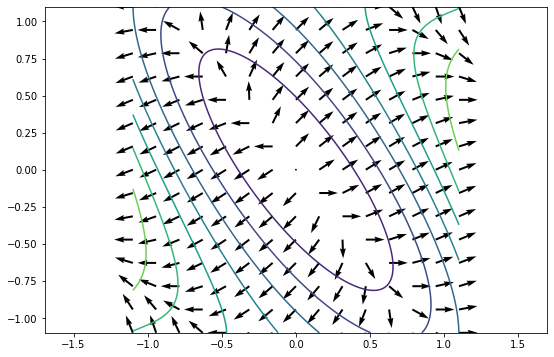

In [6]:
def draw_vector_field_2(F, xmin, xmax, ymin, ymax, N=15):
    X = np.linspace(xmin, xmax, N)  # x coordinates of the grid points
    Y = np.linspace(ymin, ymax, N)  # y coordinates of the grid points
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # compute the norm of (U,V)
    M[M == 0] = 1  # avoid division by 0
    U /= M  # normalize the u componant
    V /= M  # normalize the v componant
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines_2(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 

f = lambda x, y : np.cosh(x)+ np.sin(x + y)**2
df = lambda x, y : np.array([np.sinh(x) + 2*np.cos(x + y)*np.sin(x + y), 2*np.cos(x + y)*np.sin(x + y)])
%matplotlib inline
plt.figure(figsize=(9,6))
level_lines_2(f, -1.1, 1.1, -1.1, 1.1, np.linspace(1, 3, 10))
draw_vector_field_2(df, -1.1, 1.1, -1.1, 1.1)
plt.axis('equal')
plt.show()

1.0522582618471525
1.6617687017507627
-0.6095104399036103
1.058684800857067
1.0101176975429305
0.04856710331413669
1.0404515831980996
1.0073376709331556
0.03311391226494408
1.0145735517278633
1.0161656438561482
-0.001592092128284905
1.0096528015682922
1.0092277697135514
0.00042503185474077314
1.0067425573552915
1.0059027964538063
0.0008397609014852586
1.0047674002973213
1.0037325629766172
0.001034837320704131
1.0030811768525356
1.003574513425084
-0.0004933365725484317
1.0019164410064507
1.0021127524915092
-0.00019631148505843527
1.0020498319200597
1.0006070092343313
0.0014428226857283516
1.0008727004655473
1.0009857860150764
-0.00011308554952914356
1.0005646249775375
1.0005719805192097
-7.355541672137442e-06
1.0007427210981774
1.000099797847829
0.0006429232503484164
1.0002825424989246
1.0003276486845436
-4.5106185619009405e-05
1.0001877007138087
1.0002300667463957
-4.236603258690459e-05
1.000106722562579
1.0001411679343912
-3.444537181209077e-05
1.0000494329085323
1.0000708500067381
-2

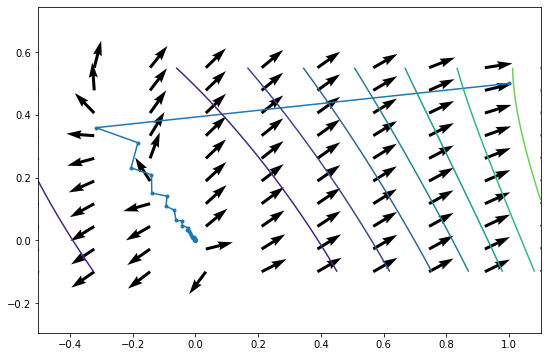

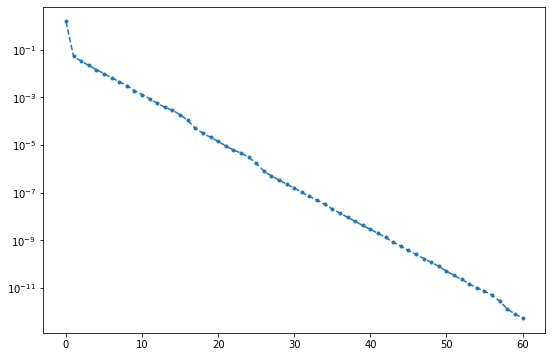

nbre d'itérations : 60


In [10]:
f = lambda x, y : np.cosh(x)+ np.sin(x + y)**2
df = lambda x, y : np.array([np.sinh(x) + 2*np.cos(x + y)*np.sin(x + y), 2*np.cos(x + y)*np.sin(x + y)])

## Parametres
epsilon = 1e-6
c, beta = 0.5, 0.75
itermax = 500
iter_ls_max = 20
## initialisation 
iter = 0
x, y, alpha = 1., .5, 1. 
fz = f(x,y)
Z, F =[np.array([x, y])], [fz]
flag = 'OK'

## Boucle d'optimisation
while (iter < itermax):
    dx, dy = -df(x, y)
    d = np.hypot(dx, dy)
    if d < epsilon or flag == 'Not OK':
        break
    dd =d**2
    new_fz = f(x + alpha*dx, y + alpha*dy) 
    iter_ls = 0
    while (new_fz - fz + c*alpha*dd >=0):
        alpha *= beta
        new_fz = f(x + alpha*dx, y + alpha*dy)
        iter_ls += 1
        if (iter_ls>=iter_ls_max):
            flag = 'Not OK'
            break
    #print("d = " + str(d) + ", f(z) - 1 =" + str(fz-1) + ", t= " +str(t))
    x, y, fz = x + alpha*dx, y + alpha*dy, new_fz
    Z.append(np.array([x, y]))
    F.append(fz)
    alpha /= beta
    iter += 1

print('flag = '+flag + ', n_iter = ' + str(iter))    
    
Z = np.array(Z)
F = np.array(F)

# représentations graphiques 
plt.figure(figsize=(9,6))
plt.plot(Z[:,0],Z[:,1],'.',linestyle='-')
level_lines_2(f, -0.5, 1.1, -0.1, 0.55, np.linspace(1, 3, 10))
draw_vector_field_2(df, -0.5, 1.1, -0.1, 0.55, 10)
plt.axis('equal')
plt.show()

# Représentation des valeurs prises par f au cours des itérations.
plt.figure(figsize=(9,6))
plt.semilogy(range(len(F)),F-1,'.',linestyle='dashed')
plt.show()

print("nbre d'itérations :", iter)

On considère maintenant la fonction définie sur $\mathbb{R}^3$ par 
$$
f(x,y,z):= \cosh(x) + \sin^2(x+y) + (y-z)^2,\qquad \text{pour }w=(x,y,z)\in \mathbb{R}^3.
$$

**Question 14.** Appliquez la méthode d'optimisation ci-dessus à cette fonction, en commençant par $w^0=(1,0.5,1)$ (avec toujours $c=0.5$, $\beta=0.75$ et $\alpha=1$ à la première itération).

In [ ]:
f = lambda w : np.cosh(w[0])+ np.sin(w[0] + w[1])**2 + (w[1] - w[2])**2
df = lambda w : np.array([np.sinh(w[0]) + 2*np.cos(w[0] + w[1])*np.sin(w[0] + w[1]), 
                                2*np.cos(w[0] + w[1])*np.sin(w[0] + w[1]) + 2*(w[1] - w[2]),  2*(w[2] - w[1])])

## Paramètres
epsilon = 1e-6
c, beta = 0.5, 0.75
itermax = 200
iter_ls_max =30

## initialisation 
iter = 0
w, alpha = np.array([1., .5, 4.]) , 1.
fw = f(w)
W, F =[w], [fw]
flag = 'OK'

## Boucle d'optmization
while (iter < itermax):
    d = -df(w)
    norm_d = np.linalg.norm(d)
    if norm_d < epsilon or flag == 'Not OK':
        break
    dd =norm_d**2
    new_fw = f(w + alpha*d)
    iter_ls = 0
    while (new_fw - fw + c*alpha*dd >=0):
        alpha *= beta
        new_fw = f(w + alpha*d) 
        iter_ls += 1
        if (iter_ls>=iter_ls_max):
            flag = 'Not OK'
            break
    #print("norm_d = " + str(norm_d) + ", f(w) - 1 =" + str(fw-1) + ", t= " +str(t))
    w, fw = w + alpha*d, new_fw
    alpha /= beta
    W.append(w)
    F.append(fw)
    iter += 1

print('flag = '+flag + ', n_iter = ' + str(iter) + ', itermax = ' + str(itermax))   


# Représentation des itérés.


from mpl_toolkits.mplot3d import Axes3D

W = np.array(W)
x, y, z = W[:,0], W[:,1], W[:,2]
ax = Axes3D(plt.figure())  # Define the 3D plot
ax.set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')
ax.plot(x, y, z,'.')  # Plot of the trajectory
plt.show()


# Représentation des valeurs prises par f au cours des itérations
F = np.array(F)
plt.figure()
plt.semilogy(range(len(F)), F-1, '.', linestyle='dashed')
plt.show()